# Generating Vega-Lite plots with Altair

Altair generates *Vega-Lite* from Python, and displays it. There is also [PdVega](https://jakevdp.github.io/pdvega/), which produces Vega-Lite from Pandas. Altair too is built around Pandas DataFrame.

Anyway. For Altair to render in Jupyter Notebooks, we need `ipyvega` to be installed, which is in Python package `vega` ≠ `vega3`, I think.

In [2]:
import numpy as np
import pandas as pd
import sklearn.datasets
import altair

Data

In [36]:
iris = sklearn.datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['specie'] = ["specie " + t for t in iris.target.astype(str)]

In [37]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'specie'],
      dtype='object')

## Plot stuff

Ok so make an `altair.Chart` object, and provide visual encodings.

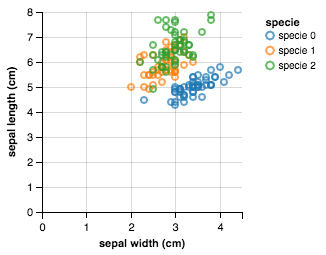

In [38]:
chart = altair.Chart(df, height=200, width=200).mark_point().encode(
    x="sepal width (cm)",
    y="sepal length (cm)",
#    color=altair.Color("species", type="nominal")
    color="specie"
)
chart

Vega-Lite specification is available via `altair.Chart.to_json()`, which can be verified e.g. with the [Vega-Lite online editor](https://vega.github.io/editor/)

In [49]:
print(chart.to_json(indent=2)) # chart.to_json() returns a raw string

{
  "$schema": "https://vega.github.io/schema/vega-lite/v1.2.1.json",
  "data": {
    "values": [
      {
        "petal length (cm)": 1.4,
        "petal width (cm)": 0.2,
        "sepal length (cm)": 5.1,
        "sepal width (cm)": 3.5,
        "specie": "specie 0"
      },
      {
        "petal length (cm)": 1.4,
        "petal width (cm)": 0.2,
        "sepal length (cm)": 4.9,
        "sepal width (cm)": 3.0,
        "specie": "specie 0"
      },
      {
        "petal length (cm)": 1.3,
        "petal width (cm)": 0.2,
        "sepal length (cm)": 4.7,
        "sepal width (cm)": 3.2,
        "specie": "specie 0"
      },
      {
        "petal length (cm)": 1.5,
        "petal width (cm)": 0.2,
        "sepal length (cm)": 4.6,
        "sepal width (cm)": 3.1,
        "specie": "specie 0"
      },
      {
        "petal length (cm)": 1.4,
        "petal width (cm)": 0.2,
        "sepal length (cm)": 5.0,
        "sepal width (cm)": 3.6,
        "specie": "specie 0"
      },
  

From [the tutorial, with mock data](https://altair-viz.github.io/tutorials/getting-started.html). Altair API is pretty nice, with chained functions, `mark_*` followed by `encode()` and making declarations about Pandas DataFrame columns.

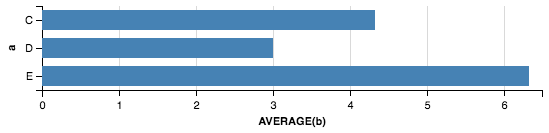

In [46]:
data = pd.DataFrame({'a': list('CCCDDDEEE'),
                     'b': [2, 7, 4, 1, 2, 6, 8, 4, 7]})

altair.Chart(data).mark_bar().encode(
    y='a',
    x='average(b)'
)

## Shorthand

This shorthand

    altair.Y('average(b):Q')

expands to

    altair.Y(field='b', type='quantitative', aggregate='average')
    
and produces the same Vega-Lite specification

    {"aggregate": "average", "field": "b", "type": "quantitative"}

In [60]:
altair.Y('average(b):Q').to_json() == altair.Y(field='b', type='quantitative', aggregate='average').to_json()

True